# Hierarchical Clustering

In [1]:
import pandas as pd

Load Dataset

In [2]:
df = pd.read_csv('nursery.data',names=['parents','has_nurs','form','children','housing','finance','social','health','class'])
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


Convert the string data into numeric, as we need numeric data to pass through our algorithm

In [3]:
from sklearn import preprocessing

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df.iloc[:,0])

LabelEncoder()

In [5]:
data = pd.DataFrame(columns=['parents','has_nurs','form','children','housing','finance','social','health','class'])

In [6]:
data['parents'] = le.transform(df.iloc[:,0])

In [7]:
le.fit(df.iloc[:,1])
data['has_nurs'] =  le.transform(df.iloc[:,1])

In [8]:
le.fit(df.iloc[:,2])
data['form'] =  le.transform(df.iloc[:,2])

In [9]:
le.fit(df.iloc[:,3])
data['children'] =  le.transform(df.iloc[:,3])

In [10]:
le.fit(df.iloc[:,4])
data['housing'] =  le.transform(df.iloc[:,4])

In [11]:
le.fit(df.iloc[:,5])
data['finance'] =  le.transform(df.iloc[:,5])

In [12]:
le.fit(df.iloc[:,6])
data['social'] =  le.transform(df.iloc[:,6])

In [13]:
le.fit(df.iloc[:,7])
data['health'] =  le.transform(df.iloc[:,7])

In [14]:
le.fit(df.iloc[:,8])
data['class'] =  le.transform(df.iloc[:,8])

In [15]:
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1


Hierarchical Clustering Dendrograms and AgglomerativeClustering

In [16]:
import matplotlib.pyplot as plt  
%matplotlib inline

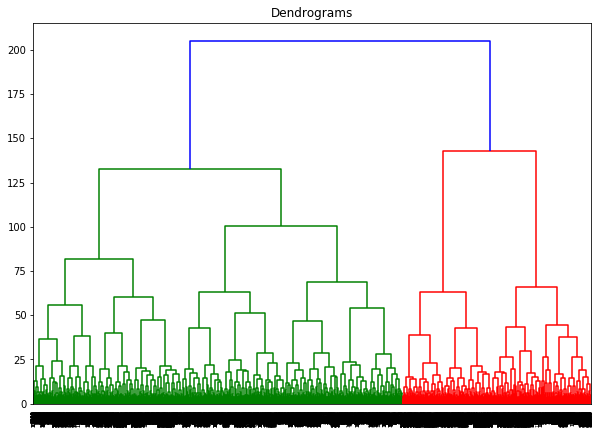

In [17]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

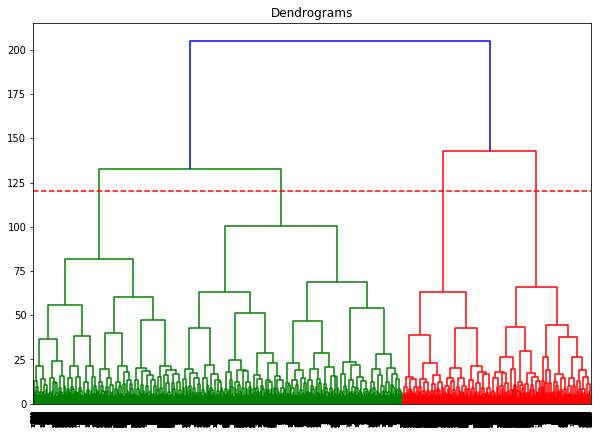

In [18]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=120, color='r', linestyle='--')

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc  = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_hc = hc.fit_predict(data) 

In [20]:
print(y_hc)

[1 1 1 ... 3 3 4]


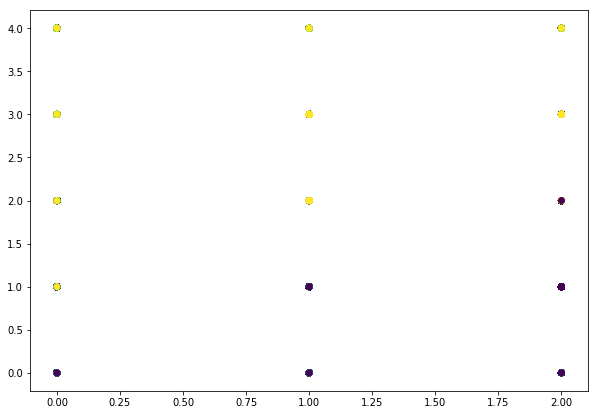

In [22]:
plt.figure(figsize=(10, 7))  
# change the cloumn name accordingly to visualize 
plt.scatter(data['parents'], data['has_nurs'], c=hc.labels_) 